# Ensemble Learning and Random Forests

Ensemble Learning is a technique rooted in the wisdom of the crowd concept, where aggregated predictions from a group of predictors, known as an ensemble, often outperform individual predictors. An example is the Random Forest algorithm, comprised of Decision Tree classifiers trained on distinct subsets of the training data. 

The ensemble's combined predictions, often determined by majority voting, yield robust results. Ensemble methods, such as bagging, boosting, and stacking, are commonly employed in Machine Learning projects to enhance the performance of existing predictors. This approach has proven successful in various contexts, including competitive Machine Learning competitions like the Netflix Prize. The chapter delves into popular Ensemble methods and explores the influential Random Forest technique.

In [1]:
# Setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Voting Classifiers

Imagine having developed several classifiers, each achieving an approximately 80% accuracy rate. Among these classifiers, you might have implemented a range of models such as Logistic Regression, Support Vector Machine (SVM), Random Forest, K-Nearest Neighbors (K-NN), and potentially others.

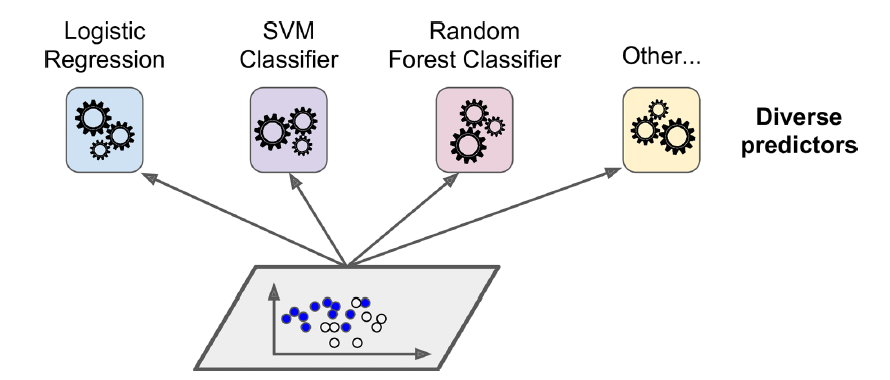

An effective approach to enhance classifier performance involves aggregating the predictions of individual classifiers and subsequently predicting the class that receives the highest number of votes. This amalgamated classifier, employing a majority-vote mechanism, is referred to as a hard voting classifier.

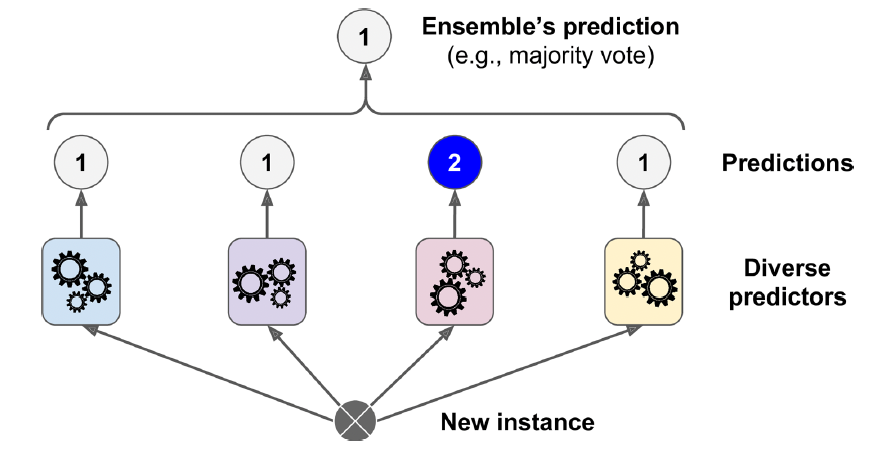

Surprisingly, the hard voting classifier often achieves higher accuracy than the best individual classifier within the ensemble. This phenomenon holds true even if each classifier is a weak learner, performing only marginally better than random guessing. This strength arises from the collective diversity of a sufficient number of weak learners. 

To understand this, consider the analogy of a slightly biased coin that tends to land heads with a 51% probability and tails with 49%. Over many tosses, the proportion of heads converges toward the probability of heads (51%) due to the law of large numbers, resulting in a majority of heads. Similarly, by combining diverse classifiers in an ensemble, even if they are individually weak, the ensemble can emerge as a robust learner, exploiting the underlying principle of convergence toward improved accuracy.

Likewise, consider an ensemble comprised of 1,000 classifiers, each with an individual accuracy of just 51%, slightly surpassing random chance. Employing majority voting, this ensemble could yield an accuracy of approximately 75%, assuming ideal independence and uncorrelated errors among classifiers. However, this assumption is unrealistic since the classifiers are trained on the same data, leading to shared error patterns. Consequently, numerous erroneous majority votes for an incorrect class may occur, diminishing the ensemble's overall accuracy.

The provided code snippet utilizes Scikit-Learn to establish and train a voting classifier, consisting of three distinct classifiers. The training data employed is sourced from the moons dataset, previously introduced in Chapter 5.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896
VotingClassifier 0.904
